# CONTENTS

    #1. Importing libraries and Dataset
    
    #2. Check security implications on the PII data and do the needful
    
    #3. Regional Segmentation
    
    #4. Exclude low activity customers
    
    #5. Customer profiles
        
        a. Based on age
        
        b. Based on income
        
        c. Based on dietary choice
        
        d. Based on certain products
        
        e. Based on number of dependants
        
        f. Based on family status
        
        g. Based on gender
        
        h. Based on loyalty
        
        i. Based on frequent orders
        
     #7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

     #8. Compare customer profiles with regions and departments
     
        a. Orders by region
        
        b. Orders from customers(by frequency) across regions - Ordering habits
        
        c. Orders based on customer loyalty by region - Ordering habits
        
        d. Orders based on family status by region - Ordering habits
        
        e. Orders based on gender by region - Ordering habits
        
        f. Regional orders by Department
        
        g. Customer Loyalty by Department - Ordering habits
        
        h. Orders from customers(by frequency) across departments - Ordering habits
        
        i. Orders based on number of dependants across departments - Ordering habits
        
        j. Orders based on income across departments - Ordering habits
        
        k. Orders based on age group across departments - Ordering habits
        
        l. Orders based on spender type by Region - Ordering habits
        
        m. Orders based on age group by day of the week.
        
        n. Departments with most orders
        
        o. Average price of items by department
    

# 1. Importing libraries and Datset

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Setting the path for the dataset
path = r'C:\\Users\\cpaul\\Documents\\Career Foundry\\Instacart Basket Analysis'

# Import merged Instacart data with customers (instacart_customers_merged)
df_instacart_customers_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'instacart_customers_merged.pkl'))

# 2. Check security implications on the PII data and do the needful

In [3]:
# Checking data shape
df_instacart_customers_merged.shape

(32404859, 33)

In [4]:
df_instacart_customers_merged.head(10)

order_id  user_id  order_number  orders_day_of_week  order_hour_of_day  \
0   2539329        1             1                   2                  8   
1   2398795        1             2                   3                  7   
2    473747        1             3                   3                 12   
3   2254736        1             4                   4                  7   
4    431534        1             5                   4                 15   
5   3367565        1             6                   2                  7   
6    550135        1             7                   1                  9   
7   3108588        1             8                   1                 14   
8   2295261        1             9                   1                 16   
9   2550362        1            10                   4                  8   

   days_since_previous_order  product_id  add_to_cart_order  reordered  \
0                        NaN         196                  1          0   
1                       15.0         196                  1          1   
2                       21.0         196                  1          1   
3                       29.0         196                  1          1   
4                       28.0         196                  1          1   
5                       19.0         196                  1          1   
6                       20.0         196                  1          1   
7                       14.0         196                  2          1   
8                        0.0         196                  4          1   
9                       30.0         196                  1          1   

  product_name  ...  first_name  last_name  gender    state age date_joined  \
0         Soda  ...       Linda     Nguyen  Female  Alabama  31   2/17/2019   
1         Soda  ...       Linda     Nguyen  Female  Alabama  31   2/17/2019   
2         Soda  ...       Linda     Nguyen  Female  Alabama  31   2/17/2019   
3         Soda  ...       Linda     Nguyen  Female  Alabama  31   2/17/2019   
4         Soda  ...       Linda     Nguyen  Female  Alabama  31   2/17/2019   
5         Soda  ...       Linda     Nguyen  Female  Alabama  31   2/17/2019   
6         Soda  ...       Linda     Nguyen  Female  Alabama  31   2/17/2019   
7         Soda  ...       Linda     Nguyen  Female  Alabama  31   2/17/2019   
8         Soda  ...       Linda     Nguyen  Female  Alabama  31   2/17/2019   
9         Soda  ...       Linda     Nguyen  Female  Alabama  31   2/17/2019   

  number_of_dependants  family_status income  _merge  
0                    3        married  40423    both  
1                    3        married  40423    both  
2                    3        married  40423    both  
3                    3        married  40423    both  
4                    3        married  40423    both  
5                    3        married  40423    both  
6                    3        married  40423    both  
7                    3        married  40423    both  
8                    3        married  40423    both  
9                    3        married  40423    both  

[10 rows x 33 columns]

In [5]:
df_instacart_customers_merged.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_previous_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_price', 'spender_type_flag', 'median_days_since_previous_order',
       'frequency_flag', 'first_name', 'last_name', 'gender', 'state', 'age',
       'date_joined', 'number_of_dependants', 'family_status', 'income',
       '_merge'],
      dtype='object')

In [6]:
# Drop the "_merge" column
df_instacart_customers_merged.drop(["_merge"], axis = 1, inplace=True)

In [7]:
# Drop the first name and last name columns since it is PII data (axis = 1 means columns, axis = 0 is for rows)
df_instacart_customers_merged.drop(["first_name", "last_name"], axis = 1, inplace=True)


In [8]:
df_instacart_customers_merged.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_previous_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_price', 'spender_type_flag', 'median_days_since_previous_order',
       'frequency_flag', 'gender', 'state', 'age', 'date_joined',
       'number_of_dependants', 'family_status', 'income'],
      dtype='object')

In [9]:
# Creating a crosstab to check the days_since_previous_order with order_number to see if only the first orders were null - Following the exercise for practice
crosstab = pd.crosstab(df_instacart_customers_merged['days_since_previous_order'], df_instacart_customers_merged['order_number'], dropna = False)

In [10]:
crosstab.to_clipboard()

In [11]:
# Checking the Nan values once again to check
df_instacart_customers_merged.isnull().sum()


order_id                                  0
user_id                                   0
order_number                              0
orders_day_of_week                        0
order_hour_of_day                         0
days_since_previous_order           2076096
product_id                                0
add_to_cart_order                         0
reordered                                 0
product_name                              0
aisle_id                                  0
department_id                             0
prices                                    0
price_range_loc                           0
busiest_day                               0
busiest_days                              0
busiest_period_of_day                     0
max_order                                 0
loyalty_flag                              0
mean_price                                0
spender_type_flag                         0
median_days_since_previous_order          5
frequency_flag                  

In [12]:
#Create dataframe with missing data (median_days_since_previous_order - 5 values) 
df_nan = df_instacart_customers_merged[df_instacart_customers_merged['median_days_since_previous_order'].isnull()==True]

In [13]:
df_nan

order_id  user_id  order_number  orders_day_of_week  \
32377906    895835   159838             1                   0   
32377907    895835   159838             1                   0   
32377908    895835   159838             1                   0   
32377909    895835   159838             1                   0   
32377910    895835   159838             1                   0   

          order_hour_of_day  days_since_previous_order  product_id  \
32377906                 17                        NaN       10749   
32377907                 17                        NaN       33401   
32377908                 17                        NaN       23695   
32377909                 17                        NaN       21334   
32377910                 17                        NaN       22198   

          add_to_cart_order  reordered  \
32377906                  3          0   
32377907                  6          0   
32377908                  2          0   
32377909                  5          0   
32377910                  1          0   

                                               product_name  ...  \
32377906                            Organic Red Bell Pepper  ...   
32377907                               Goat Cheese Crumbles  ...   
32377908                           California Veggie Burger  ...   
32377909                              Organic Peeled Garlic  ...   
32377910  4X Ultra Concentrated Natural Laundry Detergen...  ...   

          spender_type_flag  median_days_since_previous_order  \
32377906        Low spender                               NaN   
32377907        Low spender                               NaN   
32377908        Low spender                               NaN   
32377909        Low spender                               NaN   
32377910        Low spender                               NaN   

                 frequency_flag gender     state age date_joined  \
32377906  Non-frequent customer   Male  Arkansas  63   11/9/2018   
32377907  Non-frequent customer   Male  Arkansas  63   11/9/2018   
32377908  Non-frequent customer   Male  Arkansas  63   11/9/2018   
32377909  Non-frequent customer   Male  Arkansas  63   11/9/2018   
32377910  Non-frequent customer   Male  Arkansas  63   11/9/2018   

          number_of_dependants family_status  income  
32377906                     3       married  140994  
32377907                     3       married  140994  
32377908                     3       married  140994  
32377909                     3       married  140994  
32377910                     3       married  140994  

[5 rows x 30 columns]

In [14]:
# The derived column, frequency_flag is updated properly as Non-frequent customer for this user and we don't have to worry about the Nan values in the median_days_since_previous_order column. 

# 3. Regional segmentation

In [15]:
# Making a list of states to create regions 
Northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
Midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
West = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']
South= ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']


In [16]:
# Create the region column by using the loc() function and fill 
df_instacart_customers_merged.loc[df_instacart_customers_merged['state'].isin(Northeast), 'region'] = 'NorthEast'
df_instacart_customers_merged.loc[df_instacart_customers_merged['state'].isin(Midwest), 'region'] = 'MidWest'
df_instacart_customers_merged.loc[df_instacart_customers_merged['state'].isin(West), 'region'] = 'West'
df_instacart_customers_merged.loc[df_instacart_customers_merged['state'].isin(South), 'region'] = 'South'



In [17]:
df_instacart_customers_merged['region'].value_counts(dropna = False)

South        10791885
West          8292913
MidWest       7597325
NorthEast     5722736
Name: region, dtype: int64

In [18]:
#Determine whether there’s a difference in spending habits between the different U.S. regions. 
# Create a crosstab between region and spender_type_flag

crosstab = pd.crosstab(df_instacart_customers_merged['region'], df_instacart_customers_merged['spender_type_flag'], dropna = False)

In [20]:
crosstab

spender_type_flag  High spender  Low spender
region                                      
MidWest                  155975      7441350
NorthEast                108225      5614511
South                    209691     10582194
West                     160354      8132559

# South region has the most customers overall. The percentage of high spenders is very low compared to the low spenders.

# 4. Exclude low activity customers

In [21]:
# Creating exclusion flag for max_order less than 5
df_instacart_customers_merged['exclusion_flag'] = df_instacart_customers_merged['max_order'].apply(lambda x: 'Y' if x < 5 else 'N')

In [22]:
df_instacart_customers_merged.head(10)

order_id  user_id  order_number  orders_day_of_week  order_hour_of_day  \
0   2539329        1             1                   2                  8   
1   2398795        1             2                   3                  7   
2    473747        1             3                   3                 12   
3   2254736        1             4                   4                  7   
4    431534        1             5                   4                 15   
5   3367565        1             6                   2                  7   
6    550135        1             7                   1                  9   
7   3108588        1             8                   1                 14   
8   2295261        1             9                   1                 16   
9   2550362        1            10                   4                  8   

   days_since_previous_order  product_id  add_to_cart_order  reordered  \
0                        NaN         196                  1          0   
1                       15.0         196                  1          1   
2                       21.0         196                  1          1   
3                       29.0         196                  1          1   
4                       28.0         196                  1          1   
5                       19.0         196                  1          1   
6                       20.0         196                  1          1   
7                       14.0         196                  2          1   
8                        0.0         196                  4          1   
9                       30.0         196                  1          1   

  product_name  ...         frequency_flag  gender    state age date_joined  \
0         Soda  ...  Non-frequent customer  Female  Alabama  31   2/17/2019   
1         Soda  ...  Non-frequent customer  Female  Alabama  31   2/17/2019   
2         Soda  ...  Non-frequent customer  Female  Alabama  31   2/17/2019   
3         Soda  ...  Non-frequent customer  Female  Alabama  31   2/17/2019   
4         Soda  ...  Non-frequent customer  Female  Alabama  31   2/17/2019   
5         Soda  ...  Non-frequent customer  Female  Alabama  31   2/17/2019   
6         Soda  ...  Non-frequent customer  Female  Alabama  31   2/17/2019   
7         Soda  ...  Non-frequent customer  Female  Alabama  31   2/17/2019   
8         Soda  ...  Non-frequent customer  Female  Alabama  31   2/17/2019   
9         Soda  ...  Non-frequent customer  Female  Alabama  31   2/17/2019   

  number_of_dependants family_status  income region  exclusion_flag  
0                    3       married   40423  South               N  
1                    3       married   40423  South               N  
2                    3       married   40423  South               N  
3                    3       married   40423  South               N  
4                    3       married   40423  South               N  
5                    3       married   40423  South               N  
6                    3       married   40423  South               N  
7                    3       married   40423  South               N  
8                    3       married   40423  South               N  
9                    3       married   40423  South               N  

[10 rows x 32 columns]

In [23]:
# Subsetting and excluding low activity customers to export, which includes only the high activity customers
df_low_activity_customers_excluded = df_instacart_customers_merged[df_instacart_customers_merged['exclusion_flag']=='N']

In [24]:
df_low_activity_customers_excluded.shape

(30964564, 32)

In [25]:
# Checking the value_counts()
df_instacart_customers_merged['exclusion_flag'].value_counts()

N    30964564
Y     1440295
Name: exclusion_flag, dtype: int64

In [26]:
# Export this dataframe with low activity customers excluded
df_low_activity_customers_excluded.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'instacart_low_activity_customers_excluded_final.pkl'))

# 4. Customer profiles

In [27]:
# Import Departments dataset since we can analyze using the department, department name is useful for chart axis labels
df_department = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

df_department

Unnamed: 0       department
0            1           frozen
1            2            other
2            3           bakery
3            4          produce
4            5          alcohol
5            6    international
6            7        beverages
7            8             pets
8            9  dry goods pasta
9           10             bulk
10          11    personal care
11          12     meat seafood
12          13           pantry
13          14        breakfast
14          15     canned goods
15          16       dairy eggs
16          17        household
17          18           babies
18          19           snacks
19          20             deli
20          21          missing

In [28]:
# Rename the unnamed column to department_id so that we can use this to merge with the instacart data
df_department.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)

In [30]:
df_department

department_id       department
0               1           frozen
1               2            other
2               3           bakery
3               4          produce
4               5          alcohol
5               6    international
6               7        beverages
7               8             pets
8               9  dry goods pasta
9              10             bulk
10             11    personal care
11             12     meat seafood
12             13           pantry
13             14        breakfast
14             15     canned goods
15             16       dairy eggs
16             17        household
17             18           babies
18             19           snacks
19             20             deli
20             21          missing

In [29]:
df_low_activity_customers_excluded.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_previous_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_price', 'spender_type_flag', 'median_days_since_previous_order',
       'frequency_flag', 'gender', 'state', 'age', 'date_joined',
       'number_of_dependants', 'family_status', 'income', 'region',
       'exclusion_flag'],
      dtype='object')

In [30]:
# Merge the department dataset with Instacart dataset
df_merged = df_low_activity_customers_excluded.merge(df_department, on = ['department_id'], indicator=True)

In [31]:
df_merged.shape

(30964564, 34)

In [32]:
df_merged['_merge'].value_counts()

both          30964564
left_only            0
right_only           0
Name: _merge, dtype: int64

In [33]:
df_merged.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_previous_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_price', 'spender_type_flag', 'median_days_since_previous_order',
       'frequency_flag', 'gender', 'state', 'age', 'date_joined',
       'number_of_dependants', 'family_status', 'income', 'region',
       'exclusion_flag', 'department', '_merge'],
      dtype='object')

# 4.a. Based on age

In [34]:
df_merged['age'].value_counts()

79    508337
49    507879
48    506730
31    506218
64    504832
       ...  
60    461897
36    460649
66    454604
41    451269
25    449324
Name: age, Length: 64, dtype: int64

In [35]:
# Create age_group column, Young Adult(<35),Middle age(35-64),Senior(>=65)

df_merged.loc[df_merged['age']<=35, 'age_group'] = 'Young Adult'
df_merged.loc[(df_merged['age']>35) & (df_merged['age']<=65), 'age_group'] = 'Middle Aged'
df_merged.loc[df_merged['age']>65, 'age_group'] = 'Senior'


In [36]:
df_merged['age_group'].value_counts()

Middle Aged    14494925
Young Adult     8738805
Senior          7730834
Name: age_group, dtype: int64

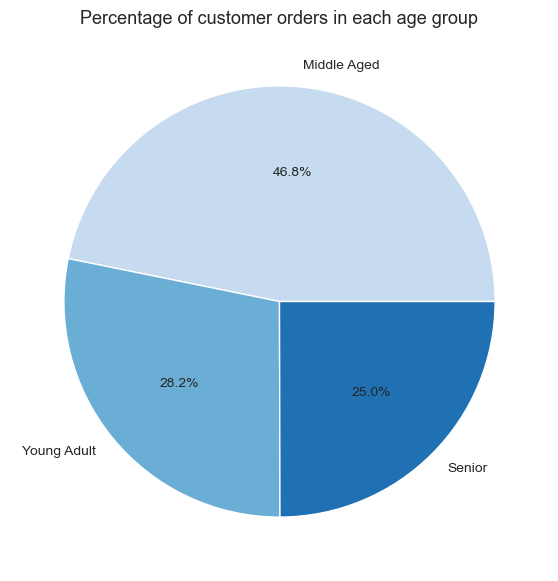

In [99]:
# Making a pie chart showing customers by age group

pie_age_group = df_merged['age_group'].value_counts().plot.pie(figsize = (7,7,), 
                                                                colors = sns.color_palette('Blues', 3), 
                                                                autopct = '%1.1f%%')
plt.ylabel('')
plt.title('Percentage of customer orders in each age group',fontsize=13)
plt.show()

In [100]:
# Saving pie chart
pie_age_group.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_age_group.png'))

# 4.b. Based on income

In [42]:
# Since there are many unique income values, I tried saving to a file 
income_counts = df_merged['income'].value_counts().sort_values()
income_counts.to_csv(os.path.join(path, '02 Data','Prepared Data', 'income_counts.csv'))


In [43]:
df_merged['income'].describe()

count    3.096456e+07
mean     9.967587e+04
std      4.314187e+04
min      2.590300e+04
25%      6.729200e+04
50%      9.676500e+04
75%      1.281020e+05
max      5.939010e+05
Name: income, dtype: float64

[Text(0.5, 0, 'Income')]

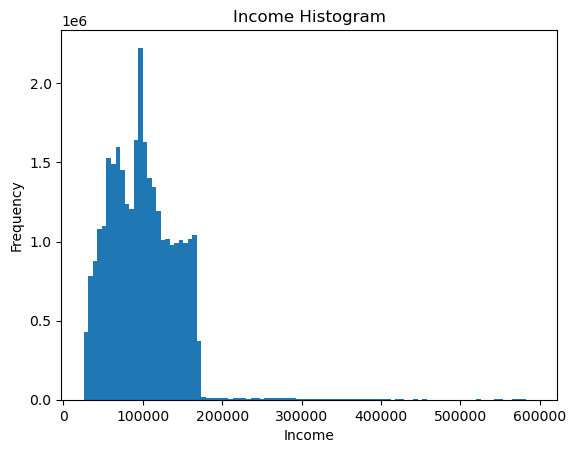

In [47]:
histogram_income = df_merged['income'].plot.hist(bins = 100, title = 'Income Histogram')
histogram_income.set(xlabel='Income')

# The minimum income is 25.9k, the maximum is 593.9k, the average is 99.67k.

In [53]:
# Grouping based on income

# Low income - less than 67k (25th percentile)
# Medium income - 67 k to 128k (upto 75th percentile)
# High income - above 75th percentile

df_merged.loc[df_merged['income'] <= 67000, 'income_group'] = 'Low income'
df_merged.loc[(df_merged['income'] > 67000) & (df_merged['income'] <= 128000), 'income_group'] = 'Medium income'
df_merged.loc[df_merged['income'] > 128000, 'income_group'] = 'High income'


In [54]:
df_merged['income_group'].value_counts()

Medium income    15549969
High income       7753117
Low income        7661478
Name: income_group, dtype: int64

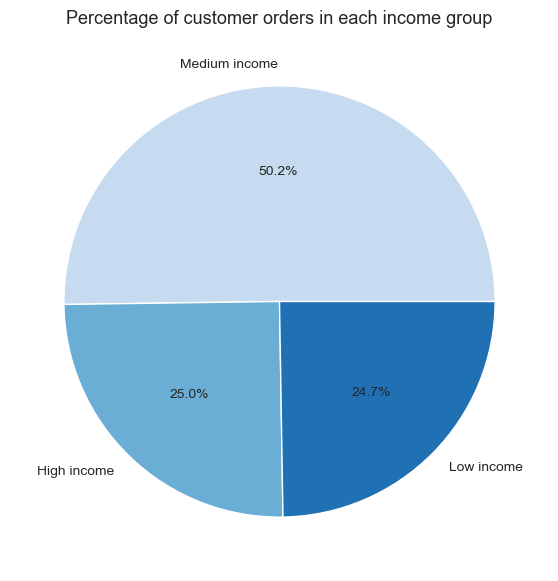

In [101]:
# Making a pie chart showing customers by income group

pie_income_group = df_merged['income_group'].value_counts().plot.pie(figsize = (7,7,), 
                                                                colors = sns.color_palette('Blues', 3), 
                                                                autopct = '%1.1f%%')
plt.ylabel('')
plt.title('Percentage of customer orders in each income group',fontsize=13)
plt.show()

In [102]:
# Saving income histogram
histogram_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'histogram_income.png'))

# Saving income pie chart
pie_income_group.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_income_group.png'))

# 4.c. Based on dietary choice

In [57]:
# Grouping based on dietary choice 

# If user have never ordered from department_id 11(meat and seafood) and 15(dairy and eggs) - vegan 
# If user have never ordered from department_id 11(meat and seafood) - vegetarian 
# All others are meat-eaters.

#Creating crosstab between deparment_id and user_id
crosstab = pd.crosstab(df_merged['department_id'], df_merged['user_id'], dropna = False)


In [58]:
crosstab

user_id        1       2       3       4       7       10      11      12      \
department_id                                                                   
1                   0      17       6       3       4       1       2       2   
2                   0       0       0       0       0       0       1       0   
3                   0       2       0       2       5       0       4       2   
4                   5      36      38       2      57      72      11      24   
5                   0       0       0       2       0       0       0       0   
6                   0       3       0       0       0       1       1       0   
7                  13       9       3       3      51       0      19       3   
8                   0       0       0       0       1       0       0      12   
9                   0       0       4       0       0       0       0       2   
10                  0       0       0       0       0       0       0       0   
11                  0       1       0       0       0       0       0       2   
12                  0       1       0       0       8      13       0       1   
13                  1      11       4       0       9      22      11       8   
14                  3       3       0       0       0       0       0       1   
15                  0       1       0       1       6       2       5       2   
16                 13      48      21       0      32      16      23       8   
17                  2       0       1       2       1       0       8       0   
18                  0       0       0       0       0       0       0       0   
19                 22      42       9       1      19       1       0       5   
20                  0      21       2       2      13      15       8       2   
21                  0       0       0       0       0       0       1       0   

user_id        13      14      ...  206198  206199  206200  206201  206202  \
department_id                  ...                                           
1                   0      35  ...       0      20      21      18      25   
2                   0       6  ...       0       0       0       0       0   
3                  14      14  ...       0      12       1      38      17   
4                  17      32  ...      10      28     135      33      48   
5                   0      13  ...       0       0       0       0       0   
6                   1       3  ...       3       2       0       2      10   
7                   2       2  ...       1      26      24      83      28   
8                   0       0  ...       0       0       0      12       0   
9                   3       9  ...       6       9       1      24       0   
10                  0       0  ...       0       0       0       0       0   
11                  0       0  ...       2       1       1       3       3   
12                  0       2  ...       1      12      10      26      12   
13                  2      51  ...       9      14      24      17       2   
14                  2       2  ...       0      13       2      17       1   
15                  5      11  ...       1       0      15       7       2   
16                 27      12  ...       4      71      20      74      14   
17                  0       9  ...       3      19       0      19       2   
18                  0       0  ...       0       3       0       0       0   
19                  3       3  ...       1      90      15      30      10   
20                  0       5  ...       0       5       4       0      23   
21                  5       1  ...       0       2       6       1       1   

user_id        206203  206206  206207  206208  206209  
department_id                                          
1                  14      76      21      26       2  
2                   0       1       0       0       0  
3                   3       2       3      62       9  
4                  36      34      50     197      19  
5    

In [59]:
# Loop through each user to check the department and assign the dietary choice 

dietary_choice_dict = dict()
for user in crosstab:
    key = user
    
    current_list = crosstab[user].tolist()
    if current_list[11] == 0 and current_list[15] == 0:
        val = 'Vegan'
    elif current_list[11] == 0:
        val = 'Vegetarian'
    else:
        val = 'Meat-eater'
    
    dietary_choice_dict[key]=val

In [64]:
for x, y in dietary_choice_dict.items():
  print(x, y)



1 Vegetarian
2 Meat-eater
3 Vegetarian
4 Vegan
7 Meat-eater
10 Meat-eater
11 Vegetarian
12 Meat-eater
13 Vegetarian
14 Meat-eater
15 Vegan
16 Meat-eater
17 Vegetarian
18 Meat-eater
19 Meat-eater
21 Vegetarian
22 Meat-eater
24 Meat-eater
26 Vegetarian
27 Vegetarian
28 Meat-eater
29 Vegetarian
30 Vegan
31 Meat-eater
32 Meat-eater
34 Vegetarian
35 Vegetarian
36 Vegetarian
37 Meat-eater
38 Meat-eater
39 Meat-eater
40 Meat-eater
41 Meat-eater
42 Vegetarian
43 Meat-eater
46 Meat-eater
47 Meat-eater
48 Meat-eater
49 Meat-eater
50 Vegetarian
52 Vegetarian
54 Meat-eater
55 Meat-eater
56 Meat-eater
57 Meat-eater
58 Meat-eater
59 Meat-eater
60 Vegetarian
62 Meat-eater
63 Meat-eater
64 Vegetarian
65 Meat-eater
66 Vegetarian
67 Vegetarian
68 Vegetarian
69 Vegetarian
70 Meat-eater
71 Meat-eater
72 Meat-eater
73 Vegetarian
74 Vegetarian
75 Vegetarian
76 Vegetarian
77 Meat-eater
78 Vegetarian
79 Vegetarian
80 Meat-eater
81 Vegetarian
82 Vegetarian
83 Meat-eater
84 Meat-eater
85 Vegetarian
86 Meat-eate

86297 Vegetarian
86298 Meat-eater
86300 Meat-eater
86301 Vegan
86302 Vegan
86303 Vegetarian
86304 Meat-eater
86305 Vegetarian
86306 Vegetarian
86307 Vegetarian
86308 Meat-eater
86309 Meat-eater
86310 Vegan
86311 Meat-eater
86314 Meat-eater
86316 Vegetarian
86317 Vegetarian
86318 Meat-eater
86320 Meat-eater
86321 Vegetarian
86322 Meat-eater
86324 Vegetarian
86326 Meat-eater
86327 Meat-eater
86328 Vegetarian
86329 Meat-eater
86330 Vegan
86331 Meat-eater
86333 Meat-eater
86335 Meat-eater
86336 Meat-eater
86337 Meat-eater
86338 Meat-eater
86339 Meat-eater
86340 Meat-eater
86342 Meat-eater
86344 Vegan
86348 Meat-eater
86349 Vegetarian
86350 Meat-eater
86355 Vegetarian
86356 Meat-eater
86357 Meat-eater
86358 Meat-eater
86359 Meat-eater
86361 Vegetarian
86362 Meat-eater
86363 Vegan
86364 Meat-eater
86365 Vegetarian
86366 Vegetarian
86367 Meat-eater
86370 Meat-eater
86371 Vegan
86372 Meat-eater
86373 Vegetarian
86375 Meat-eater
86376 Meat-eater
86378 Meat-eater
86379 Meat-eater
86380 Meat-eate

171882 Meat-eater
171884 Meat-eater
171885 Meat-eater
171886 Meat-eater
171887 Vegetarian
171888 Meat-eater
171889 Vegetarian
171890 Meat-eater
171891 Meat-eater
171893 Vegetarian
171895 Vegetarian
171896 Meat-eater
171897 Vegetarian
171899 Vegetarian
171900 Meat-eater
171901 Meat-eater
171902 Meat-eater
171903 Vegetarian
171904 Vegetarian
171905 Meat-eater
171906 Vegetarian
171907 Meat-eater
171908 Vegetarian
171915 Meat-eater
171917 Meat-eater
171918 Meat-eater
171919 Meat-eater
171920 Meat-eater
171921 Meat-eater
171922 Meat-eater
171923 Meat-eater
171925 Meat-eater
171927 Meat-eater
171928 Meat-eater
171929 Meat-eater
171930 Meat-eater
171931 Vegetarian
171932 Meat-eater
171933 Meat-eater
171934 Meat-eater
171935 Meat-eater
171937 Vegetarian
171938 Vegetarian
171939 Meat-eater
171940 Vegetarian
171941 Meat-eater
171944 Vegetarian
171948 Meat-eater
171951 Vegetarian
171952 Meat-eater
171953 Vegetarian
171954 Meat-eater
171956 Meat-eater
171957 Vegetarian
171958 Meat-eater
171959 Veg

In [66]:
# Call map function and pass the dietary_choice_dict, this will perform a lookup and return the associated value for that key:
df_merged['dietary_choice'] = df_merged['user_id'].map(dietary_choice_dict)
df_merged.head()

order_id  user_id  order_number  orders_day_of_week  order_hour_of_day  \
0   2539329        1             1                   2                  8   
1   2398795        1             2                   3                  7   
2    473747        1             3                   3                 12   
3   2254736        1             4                   4                  7   
4    431534        1             5                   4                 15   

   days_since_previous_order  product_id  add_to_cart_order  reordered  \
0                        NaN         196                  1          0   
1                       15.0         196                  1          1   
2                       21.0         196                  1          1   
3                       29.0         196                  1          1   
4                       28.0         196                  1          1   

  product_name  ...  number_of_dependants  family_status  income region  \
0         Soda  ...                     3        married   40423  South   
1         Soda  ...                     3        married   40423  South   
2         Soda  ...                     3        married   40423  South   
3         Soda  ...                     3        married   40423  South   
4         Soda  ...                     3        married   40423  South   

  exclusion_flag department _merge    age_group income_group  dietary_choice  
0              N  beverages   both  Young Adult   Low income      Vegetarian  
1              N  beverages   both  Young Adult   Low income      Vegetarian  
2              N  beverages   both  Young Adult   Low income      Vegetarian  
3              N  beverages   both  Young Adult   Low income      Vegetarian  
4              N  beverages   both  Young Adult   Low income      Vegetarian  

[5 rows x 37 columns]

In [67]:
df_merged['dietary_choice'].value_counts()

Meat-eater    23065332
Vegetarian     7589236
Vegan           309996
Name: dietary_choice, dtype: int64

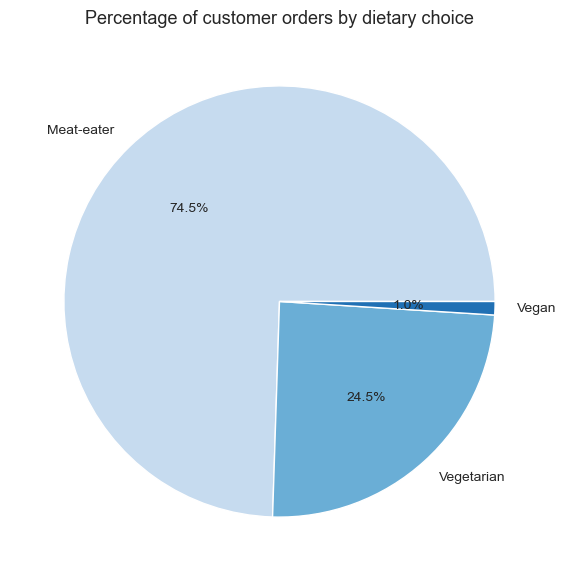

In [97]:
# Making a pie chart showing customers by dietary choice

pie_dietary_choice = df_merged['dietary_choice'].value_counts().plot.pie(figsize = (7,7,), 
                                                                colors = sns.color_palette('Blues', 3), 
                                                                autopct = '%1.1f%%')
plt.ylabel('')
plt.title('Percentage of customer orders by dietary choice',fontsize=13)
plt.show()

In [98]:
# Saving dietary choice pie chart
pie_dietary_choice.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_dietary_choice.png'))

# 4.d. Based on products in different departments

In [71]:
df_merged['department_id'].value_counts()

4     9079273
16    5177182
19    2766406
7     2571901
1     2121731
13    1782705
3     1120828
15    1012074
20    1003834
9      822136
17     699857
12     674781
14     670850
11     424306
18     410392
6      255991
5      144627
8       93060
21      64768
2       34411
10      33451
Name: department_id, dtype: int64

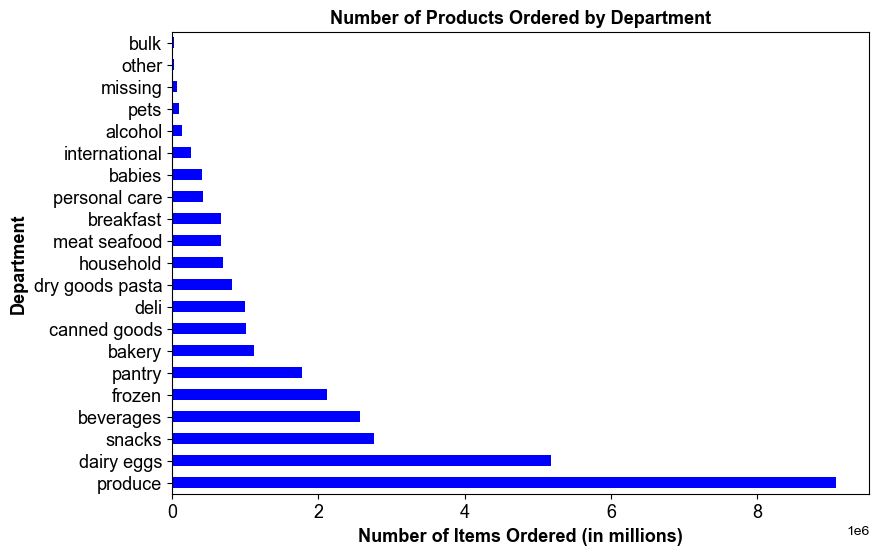

In [72]:
# Creating Bar Chart for "department" column

bar_department = df_merged['department'].value_counts().plot.barh(figsize = (9,6), color = ['blue'])
sns.set_style('ticks')
plt.xlabel('Number of Items Ordered (in millions)', fontsize = 13, fontweight = 'bold')
plt.ylabel('Department', fontsize = 13, fontweight = 'bold')
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.title('Number of Products Ordered by Department', fontsize = 13, fontweight = 'bold')
plt.show()



In [211]:
# Saving departments bar chart
bar_department.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_department.png'))

# 4.e. Based on Number of Dependants


In [74]:
df_merged['number_of_dependants'].value_counts()

3    7772516
0    7739681
2    7733261
1    7719106
Name: number_of_dependants, dtype: int64

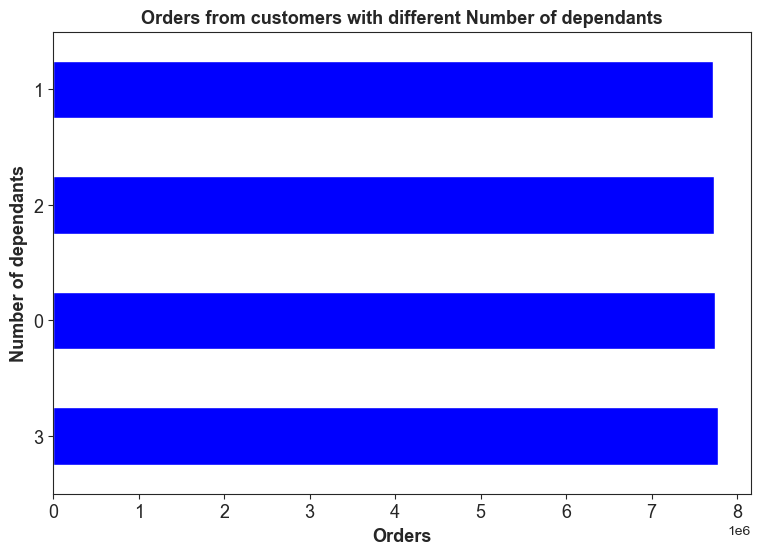

In [94]:
# Creating Bar Chart for "number_of_dependants" column

bar_number_of_dependants = df_merged['number_of_dependants'].value_counts().plot.barh(figsize = (9,6), color = ['blue'])
sns.set_style('ticks')
plt.xlabel('Orders', fontsize = 13, fontweight = 'bold')
plt.ylabel('Number of dependants', fontsize = 13, fontweight = 'bold')
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.title('Orders from customers with different Number of dependants', fontsize = 13, fontweight = 'bold')
plt.show()


# The orders from customers are almost of the same amount whether they have no dependents or they have 1, 2, 3. But if we compare the orders from customers with no dependants to customers with dependants, then the percentage is around 25% to 75% which is very evident from the bar chart.

In [95]:
# Saving Number of dependants bar chart
bar_number_of_dependants.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_number_of_dependants.png'))

# 4.f. Based on Family status

In [78]:
df_merged['family_status'].value_counts()

married                             21743711
single                               5094410
divorced/widowed                     2645271
living with parents and siblings     1481172
Name: family_status, dtype: int64

In [79]:
#Creating crosstab between family_status and number_of_dependants
crosstab = pd.crosstab(df_merged['family_status'], df_merged['number_of_dependants'], dropna = False)


In [80]:
crosstab

number_of_dependants                    0        1        2        3
family_status                                                       
divorced/widowed                  2645271        0        0        0
living with parents and siblings        0   508045   484658   488469
married                                 0  7211061  7248603  7284047
single                            5094410        0        0        0

# Only customers with family_status as "married" and "living with parents and siblings" have dependants. Since the customer profile is created for the purpose of the assignment, it does not reflect the numbers in the real world.

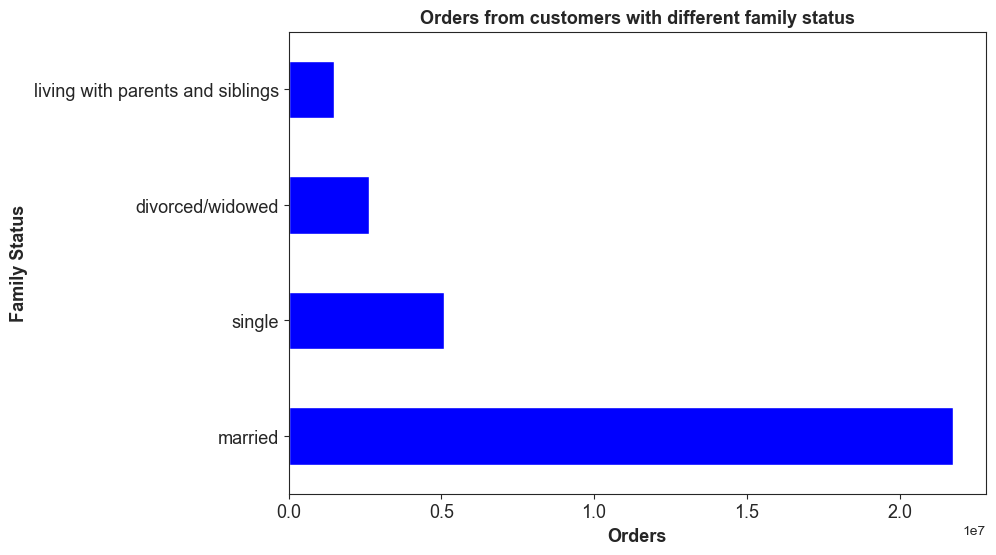

In [90]:
# Creating Bar Chart for "family_status" column

bar_family_status = df_merged['family_status'].value_counts().plot.barh(figsize = (9,6), color = ['blue'])
sns.set_style('ticks')
plt.xlabel('Orders', fontsize = 13, fontweight = 'bold')
plt.ylabel('Family Status', fontsize = 13, fontweight = 'bold')
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.title('Orders from customers with different family status', fontsize = 13, fontweight = 'bold')
plt.show()


In [91]:
# Saving Number of dependants bar chart
bar_family_status.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_family_status.png'))

# 4.g. Based on gender

In [96]:
df_merged['gender'].value_counts()

Male      15586740
Female    15377824
Name: gender, dtype: int64

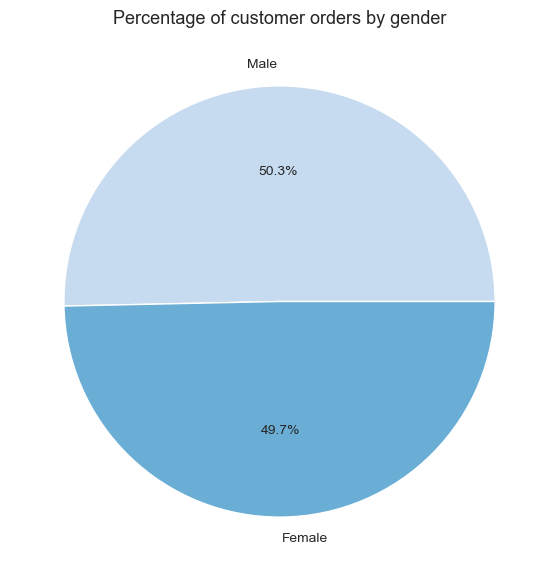

In [103]:
# Making a pie chart showing customers by gender

pie_gender = df_merged['gender'].value_counts().plot.pie(figsize = (7,7,), 
                                                                colors = sns.color_palette('Blues', 3), 
                                                                autopct = '%1.1f%%')
plt.ylabel('')
plt.title('Percentage of customer orders by gender',fontsize=13)
plt.show()

# The percentage of orders from male customers is a little more than female customers.

In [104]:
# Saving gender pie chart
pie_gender.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_gender.png'))

# 4.h. Based on loyalty

In [105]:
df_merged['loyalty_flag'].value_counts()

Regular customer    15876776
Loyal customer      10284093
New customer         4803695
Name: loyalty_flag, dtype: int64

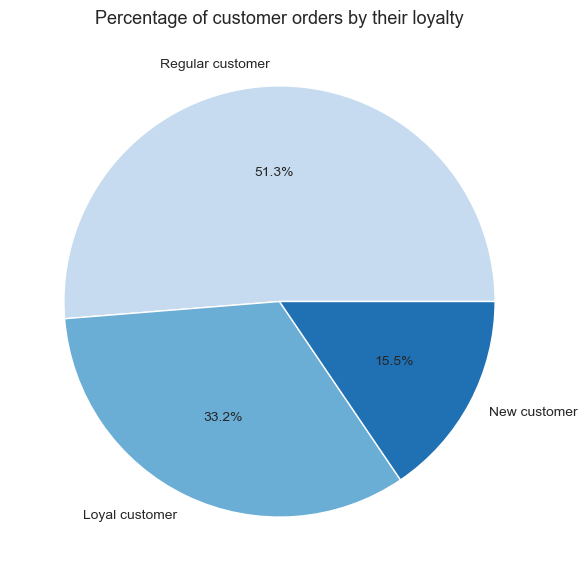

In [106]:
# Making a pie chart showing customers by loyalty

pie_loyalty = df_merged['loyalty_flag'].value_counts().plot.pie(figsize = (7,7,), 
                                                                colors = sns.color_palette('Blues', 3), 
                                                                autopct = '%1.1f%%')
plt.ylabel('')
plt.title('Percentage of customer orders by their loyalty',fontsize=13)
plt.show()

In [107]:
# Saving loyalty pie chart
pie_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_loyalty.png'))

# i. Based on customers with frequent orders

In [108]:
df_merged['frequency_flag'].value_counts()

Frequent customer        21204476
Regular customer          6865113
Non-frequent customer     2894975
Name: frequency_flag, dtype: int64

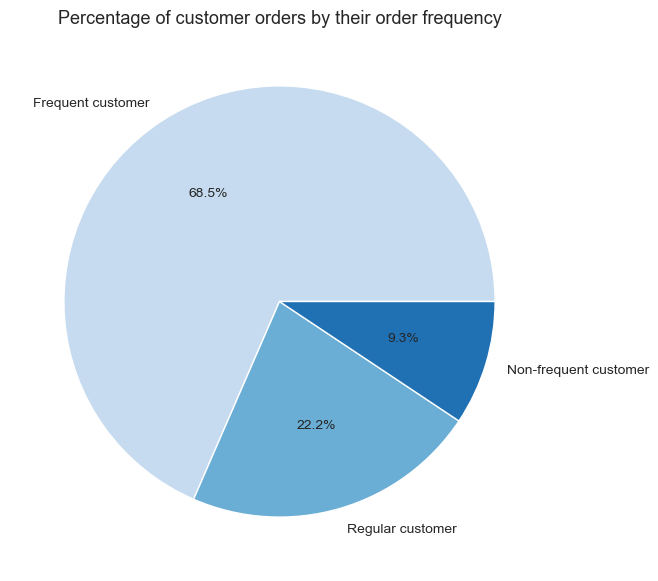

In [109]:
# Making a pie chart showing customers by frequrnt order flag

pie_frequency_flag = df_merged['frequency_flag'].value_counts().plot.pie(figsize = (7,7,), 
                                                                colors = sns.color_palette('Blues', 3), 
                                                                autopct = '%1.1f%%')
plt.ylabel('')
plt.title('Percentage of customer orders by their order frequency',fontsize=13)
plt.show()

In [110]:
# Saving frequency_flag pie chart
pie_frequency_flag.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_frequency_flag.png'))

# 7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [112]:
#Descriptive Statistics

# Usage freq. and expenditure by Age groups
age_group_order_habits = df_merged.groupby('age_group').agg({'prices': ['mean', 'min', 'max'], 
                                                              'days_since_previous_order': ['mean', 'min', 'max']})

In [113]:
age_group_order_habits

prices               days_since_previous_order           
                  mean  min      max                      mean  min   max
age_group                                                                
Middle Aged  11.898833  1.0  99999.0                 10.806894  0.0  30.0
Senior       11.828109  1.0  99999.0                 10.795536  0.0  30.0
Young Adult  12.084312  1.0  99999.0                 10.829007  0.0  30.0

In [116]:
# Usage freq. and expenditure by income_group
income_group_order_habits = df_merged.groupby('income_group').agg({'prices': ['mean', 'min', 'max'], 
                                                              'days_since_previous_order': ['mean', 'min', 'max']})

In [118]:
income_group_order_habits

prices               days_since_previous_order           
                    mean  min      max                      mean  min   max
income_group                                                               
High income    21.959259  1.0  99999.0                 10.756993  0.0  30.0
Low income      7.301387  1.0  14900.0                 10.966095  0.0  30.0
Medium income   9.217006  1.0  99999.0                 10.760295  0.0  30.0

In [119]:
# Usage freq. and expenditure by number_of_dependants
number_of_dependants_order_habits = df_merged.groupby('number_of_dependants').agg({'prices': ['mean', 'min', 'max'], 
                                                              'days_since_previous_order': ['mean', 'min', 'max']})

In [120]:
number_of_dependants_order_habits

prices               days_since_previous_order       \
                           mean  min      max                      mean  min   
number_of_dependants                                                           
0                     12.102657  1.0  99999.0                 10.791951  0.0   
1                     11.555234  1.0  99999.0                 10.802001  0.0   
2                     12.284472  1.0  99999.0                 10.830997  0.0   
3                     11.791609  1.0  99999.0                 10.816223  0.0   

                            
                       max  
number_of_dependants        
0                     30.0  
1                     30.0  
2                     30.0  
3                     30.0

In [121]:
# Usage freq. and expenditure by family_status
family_status_order_habits = df_merged.groupby('family_status').agg({'prices': ['mean', 'min', 'max'], 
                                                              'days_since_previous_order': ['mean', 'min', 'max']})

In [122]:
family_status_order_habits

prices                \
                                       mean  min      max   
family_status                                               
divorced/widowed                  11.532741  1.0  99999.0   
living with parents and siblings  10.890167  1.0  99999.0   
married                           11.944390  1.0  99999.0   
single                            12.398586  1.0  99999.0   

                                 days_since_previous_order             
                                                      mean  min   max  
family_status                                                          
divorced/widowed                                 10.750328  0.0  30.0  
living with parents and siblings                 10.750995  0.0  30.0  
married                                          10.820875  0.0  30.0  
single                                           10.813571  0.0  30.0

In [123]:
# Usage freq. and expenditure by gender
gender_order_habits = df_merged.groupby('gender').agg({'prices': ['mean', 'min', 'max'], 
                                                              'days_since_previous_order': ['mean', 'min', 'max']})

In [124]:
gender_order_habits

prices               days_since_previous_order           
             mean  min      max                      mean  min   max
gender                                                              
Female  11.837867  1.0  99999.0                 10.794361  0.0  30.0
Male    12.027894  1.0  99999.0                 10.826027  0.0  30.0

In [125]:
# Usage freq. and expenditure by dietary choice
dietary_choice_order_habits = df_merged.groupby('dietary_choice').agg({'prices': ['mean', 'min', 'max'], 
                                                              'days_since_previous_order': ['mean', 'min', 'max']})

In [126]:
dietary_choice_order_habits

prices               days_since_previous_order           
                     mean  min      max                      mean  min   max
dietary_choice                                                              
Meat-eater      11.995948  1.0  99999.0                 10.561970  0.0  30.0
Vegan            6.957126  1.0     20.0                 13.800485  0.0  30.0
Vegetarian      11.947061  1.0  99999.0                 11.456935  0.0  30.0

In [127]:
# Usage freq. and expenditure by loyalty
loyalty_flag_order_habits = df_merged.groupby('loyalty_flag').agg({'prices': ['mean', 'min', 'max'], 
                                                              'days_since_previous_order': ['mean', 'min', 'max']})

In [128]:
loyalty_flag_order_habits

prices               days_since_previous_order           
                       mean  min      max                      mean  min   max
loyalty_flag                                                                  
Loyal customer    10.386336  1.0  99999.0                  6.026656  0.0  30.0
New customer      13.387725  1.0  99999.0                 17.598691  0.0  30.0
Regular customer  12.495717  1.0  99999.0                 12.155135  0.0  30.0

In [129]:
# Usage freq. and expenditure by frequency_flag
frequency_flag_order_habits = df_merged.groupby('frequency_flag').agg({'prices': ['mean', 'min', 'max'], 
                                                              'days_since_previous_order': ['mean', 'min', 'max']})

In [130]:
frequency_flag_order_habits

prices               days_since_previous_order       \
                            mean  min      max                      mean  min   
frequency_flag                                                                  
Frequent customer      11.697724  1.0  99999.0                  7.858289  0.0   
Non-frequent customer  12.004882  1.0  99999.0                 22.790646  0.0   
Regular customer       12.631742  1.0  99999.0                 15.532112  0.0   

                             
                        max  
frequency_flag               
Frequent customer      30.0  
Non-frequent customer  30.0  
Regular customer       30.0

In [131]:
# Exporting df_merged dataframe, just to be sure not to loose the dataset
df_merged.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'instacart_merged_departmentname.pkl'))


# 8. Compare customer profiles with regions and departments

In [132]:
df_merged.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_previous_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_price', 'spender_type_flag', 'median_days_since_previous_order',
       'frequency_flag', 'gender', 'state', 'age', 'date_joined',
       'number_of_dependants', 'family_status', 'income', 'region',
       'exclusion_flag', 'department', '_merge', 'age_group', 'income_group',
       'dietary_choice'],
      dtype='object')

# 8.a. Customer orders by region

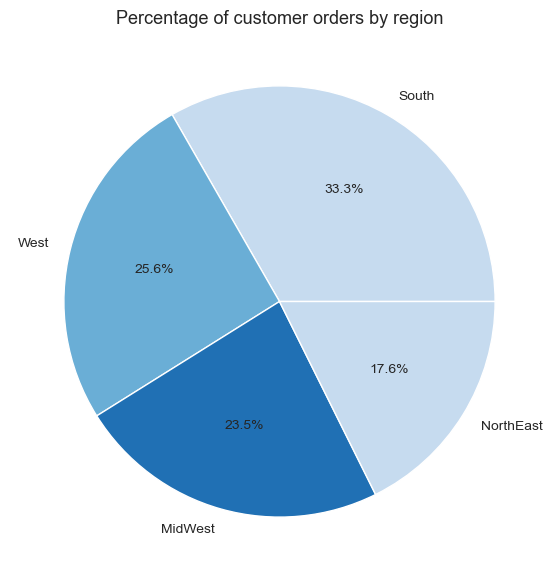

In [133]:
# Making a pie chart

pie_orders_by_region = df_merged['region'].value_counts().plot.pie(figsize = (7,7,), 
                                                                colors = sns.color_palette('Blues', 3), 
                                                                autopct = '%1.1f%%')
plt.ylabel('')
plt.title('Percentage of customer orders by region',fontsize=13)
plt.show()

In [134]:
# Saving pie chart
pie_orders_by_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_orders_by_region.png'))

# 8.b. Orders from Frequent customers by region


In [135]:
#crosstab region and frequency flag - normalized to return percentages
crosstab_frequency_by_region_n = pd.crosstab(index = df_merged['region'], 
                                         columns = df_merged['frequency_flag'], 
                                         normalize = 'index')

In [136]:
crosstab_frequency_by_region_n

frequency_flag  Frequent customer  Non-frequent customer  Regular customer
region                                                                    
MidWest                  0.679665               0.095026          0.225310
NorthEast                0.684574               0.090931          0.224495
South                    0.686034               0.093880          0.220087
West                     0.688048               0.093353          0.218599

In [138]:
#second crosstab to put labels on chart
crosstab_frequency_by_region_2 = pd.crosstab(index = df_merged['region'], 
                                         columns = df_merged['frequency_flag'])

In [139]:
crosstab_frequency_by_region_2

frequency_flag  Frequent customer  Non-frequent customer  Regular customer
region                                                                    
MidWest                   4935393                 690030           1636090
NorthEast                 3740982                 496911           1226792
South                     7073789                 968006           2269344
West                      5454312                 740028           1732887

In [1]:
#Regional distribution of frequent customer profiles - Stacked bar chart
bar_normalized_frequency_by_region = crosstab_frequency_by_region_n.plot( kind ='bar',
                                                       stacked = True,
                                                       colormap = 'Oranges',
                                                       figsize = (9, 6))
 
plt.title('Percentage of order frequency profiles by Region')
plt.legend(loc = 'lower right', ncol = 3)
plt.xlabel('Region')
plt.xticks(rotation = 0)
plt.ylabel('Proportion')

# The outer for loop uses the enumerate() function to iterate over the values in crosstab_frequency_by_region_2.index.values
# It assigns each value to the variable x, while also keeping track of the index in the variable i. 
# The [*...] syntax is used to unpack the values from crosstab_frequency_by_region_2.index.values into a list.

# The inner for loop utilizes the zip function to iterate over two series, proportion(value itself) and y_loc(the cumulative sum) obtained from the DataFrame crosstab_frequency_by_region_n by accessing the row with index x. 

for i, x in enumerate([*crosstab_frequency_by_region_2.index.values]):
    for (proportion, y_loc) in zip(crosstab_frequency_by_region_n.loc[x],
                                   crosstab_frequency_by_region_n.loc[x].cumsum()):
    
        plt.text(x= i -0.15,
                 y= y_loc,
                 s= f'{np.round(proportion * 100, 1)}%',
                 color ='black',
                 # Need to test the bbox parameter later
                 # bbox=dict(facecolor='white', edgecolor='white', boxstyle='round,pad=1'),
                 fontsize = 12,
                 fontweight = 'bold')

plt.show()


SyntaxError: invalid syntax. Perhaps you forgot a comma? (2959347845.py, line 27)

In [145]:
# Saving stacked bar chart
bar_normalized_frequency_by_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'stacked_bar_normalized_frequency_by_region.png'))

# 8. c. Orders based on customer loyalty by region - Ordering habits

In [146]:
#crosstab region and loyalty flag - normalized to return percentages
crosstab_loyalty_by_region_n = pd.crosstab(index = df_merged['region'], 
                                         columns = df_merged['loyalty_flag'], 
                                         normalize = 'index')

In [147]:
crosstab_loyalty_by_region_n

loyalty_flag  Loyal customer  New customer  Regular customer
region                                                      
MidWest             0.326898      0.156546          0.516556
NorthEast           0.337034      0.154109          0.508857
South               0.330307      0.154558          0.515135
West                0.335892      0.155302          0.508806

In [148]:
#second crosstab to put labels on chart
crosstab_loyalty_by_region_2 = pd.crosstab(index = df_merged['region'], 
                                         columns = df_merged['loyalty_flag'])

In [149]:
crosstab_loyalty_by_region_2

loyalty_flag  Loyal customer  New customer  Regular customer
region                                                      
MidWest              2373774       1136761           3750978
NorthEast            1841785        842156           2780744
South                3405844       1593664           5311631
West                 2662690       1231114           4033423

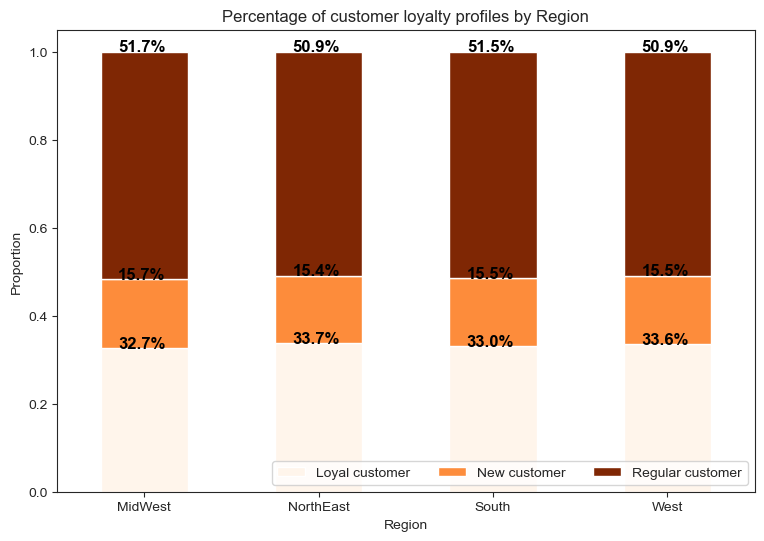

In [150]:
#Regional distribution of customer loyalty profiles - Stacked bar chart
bar_normalized_loyalty_by_region = crosstab_loyalty_by_region_n.plot( kind ='bar',
                                                       stacked = True,
                                                       colormap = 'Oranges',
                                                       figsize = (9, 6))
 
plt.title('Percentage of customer loyalty profiles by Region')
plt.legend(loc = 'lower right', ncol = 3)
plt.xlabel('Region')
plt.xticks(rotation = 0)
plt.ylabel('Proportion')

for i, x in enumerate([*crosstab_loyalty_by_region_2.index.values]):
    for (proportion, y_loc) in zip(crosstab_loyalty_by_region_n.loc[x],
                                   crosstab_loyalty_by_region_n.loc[x].cumsum()):
    
        plt.text(x= i -0.15,
                 y= y_loc,
                 s= f'{np.round(proportion * 100, 1)}%',
                 color ='black',
                 fontsize = 12,
                 fontweight = 'bold')

plt.show()

In [151]:
# Saving stacked bar chart
bar_normalized_loyalty_by_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'stacked_bar_normalized_loyalty_by_region.png'))

# 8.d. Orders based on family status by region - Ordering habits

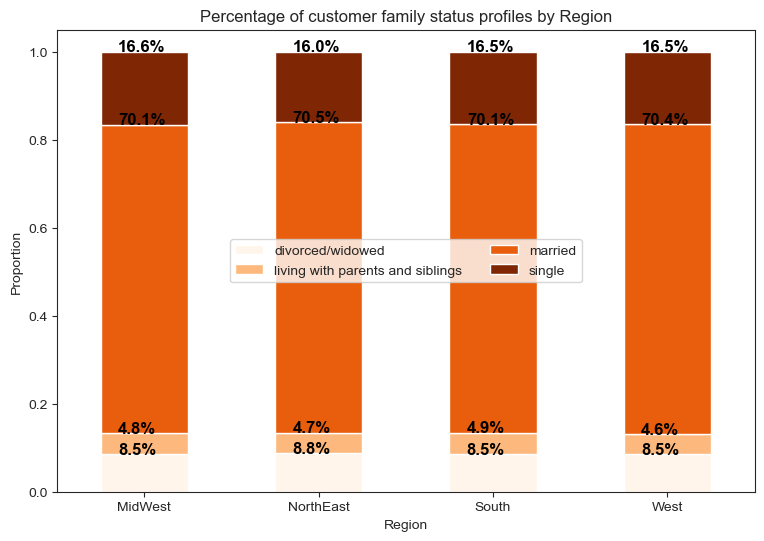

In [162]:
#crosstab region and family status - normalized to return percentages
crosstab_family_status_by_region_n = pd.crosstab(index = df_merged['region'], 
                                         columns = df_merged['family_status'], 
                                         normalize = 'index')

#second crosstab to put labels on chart
crosstab_family_status_by_region_2 = pd.crosstab(index = df_merged['region'], 
                                         columns = df_merged['family_status'])

#Regional distribution of customer family status profiles - Stacked bar chart
bar_normalized_family_status_by_region = crosstab_family_status_by_region_n.plot( kind ='bar',
                                                       stacked = True,
                                                       colormap = 'Oranges',
                                                       figsize = (9, 6))
 
plt.title('Percentage of customer family status profiles by Region')
plt.legend(loc = 'center', ncol = 2)
plt.xlabel('Region')
plt.xticks(rotation = 0)
plt.ylabel('Proportion')

for i, x in enumerate([*crosstab_family_status_by_region_2.index.values]):
    for (proportion, y_loc) in zip(crosstab_family_status_by_region_n.loc[x],
                                   crosstab_family_status_by_region_n.loc[x].cumsum()):
    
        plt.text(x= i -0.15,
                 y= y_loc,
                 s= f'{np.round(proportion * 100, 1)}%',
                 color ='black',
                 fontsize = 12,
                 fontweight = 'bold')

plt.show()

In [163]:
# Saving stacked bar chart
bar_normalized_family_status_by_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'stacked_bar_normalized_family_status_by_region.png'))

# 8.e. Orders based on gender by region - Ordering habits

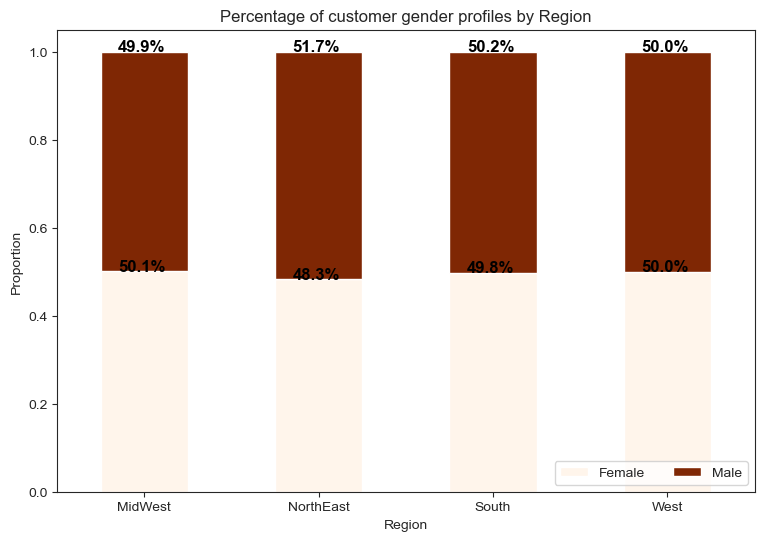

In [159]:
#crosstab region and gender - normalized to return percentages
crosstab_gender_by_region_n = pd.crosstab(index = df_merged['region'], 
                                         columns = df_merged['gender'], 
                                         normalize = 'index')

#second crosstab to put labels on chart
crosstab_gender_by_region_2 = pd.crosstab(index = df_merged['region'], 
                                         columns = df_merged['gender'])

#Regional distribution of customer gender profiles - Stacked bar chart
bar_normalized_gender_by_region = crosstab_gender_by_region_n.plot( kind ='bar',
                                                       stacked = True,
                                                       colormap = 'Oranges',
                                                       figsize = (9, 6))
 
plt.title('Percentage of customer gender profiles by Region')
plt.legend(loc = 'lower right', ncol = 2)
plt.xlabel('Region')
plt.xticks(rotation = 0)
plt.ylabel('Proportion')

for i, x in enumerate([*crosstab_gender_by_region_2.index.values]):
    for (proportion, y_loc) in zip(crosstab_gender_by_region_n.loc[x],
                                   crosstab_gender_by_region_n.loc[x].cumsum()):
    
        plt.text(x= i -0.15,
                 y= y_loc,
                 s= f'{np.round(proportion * 100, 1)}%',
                 color ='black',
                 fontsize = 12,
                 fontweight = 'bold')

plt.show()

In [160]:
# Saving stacked bar chart
bar_normalized_gender_by_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'stacked_bar_normalized_gender_by_region.png'))

# 8.f. Regional orders by Department

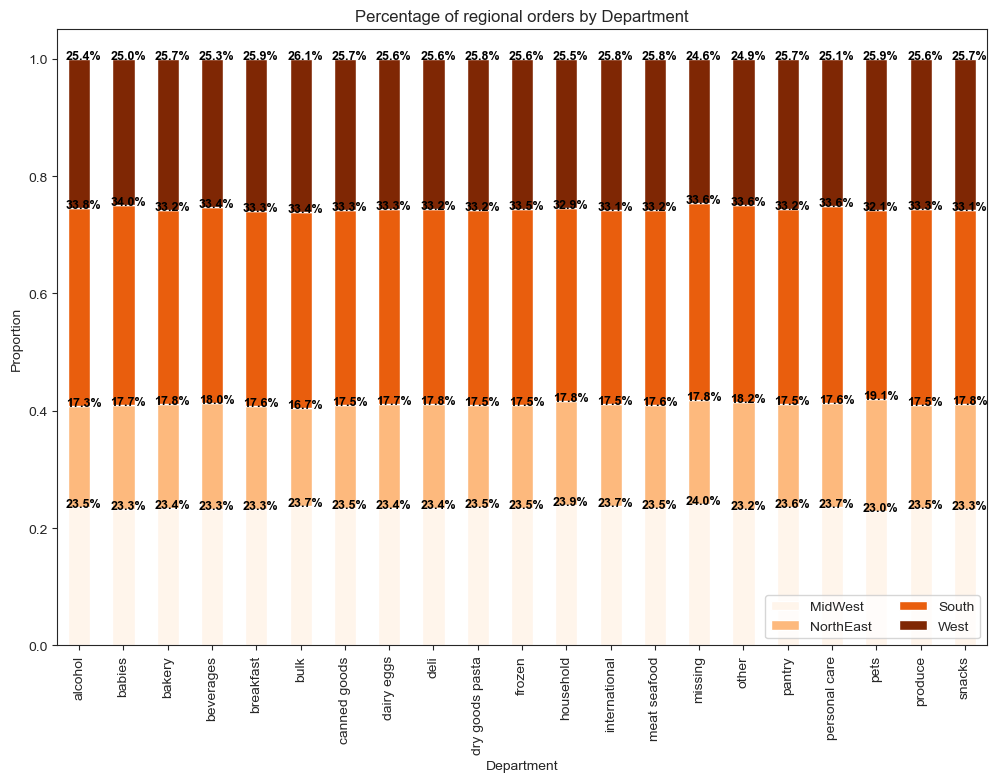

In [165]:
#crosstab department and region - normalized to return percentages
crosstab_region_by_department_n = pd.crosstab(index = df_merged['department'], 
                                         columns = df_merged['region'], 
                                         normalize = 'index')

#second crosstab to put labels on chart
crosstab_region_by_department_2 = pd.crosstab(index = df_merged['department'], 
                                         columns = df_merged['region'])

#Regional distribution of customer orders by department - Stacked bar chart
bar_normalized_region_by_department = crosstab_region_by_department_n.plot( kind ='bar',
                                                       stacked = True,
                                                       colormap = 'Oranges',
                                                       figsize = (12, 8))
 
plt.title('Percentage of regional orders by Department')
plt.legend(loc = 'lower right', ncol = 2)
plt.xlabel('Department')
plt.xticks(rotation = 90)
plt.ylabel('Proportion')

for i, x in enumerate([*crosstab_region_by_department_2.index.values]):
    for (proportion, y_loc) in zip(crosstab_region_by_department_n.loc[x],
                                   crosstab_region_by_department_n.loc[x].cumsum()):
    
        plt.text(x= i -0.30,
                 y= y_loc,
                 s= f'{np.round(proportion * 100, 1)}%',
                 color ='black',
                 fontsize = 9,
                 fontweight = 'bold')

plt.show()

In [166]:
# Saving stacked bar chart
bar_normalized_region_by_department.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'stacked_bar_normalized_region_by_department.png'))

# 8.g. Customer Loyalty by Department - Ordering habits

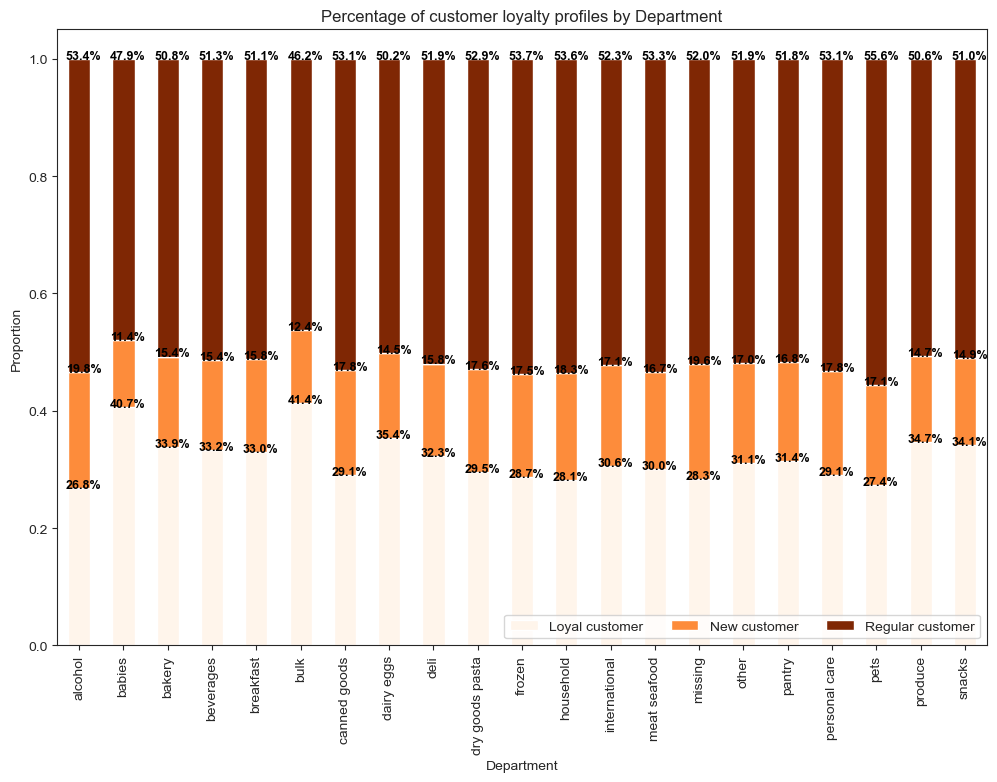

In [167]:
#crosstab department and loyalty_flag - normalized to return percentages
crosstab_loyalty_flag_by_department_n = pd.crosstab(index = df_merged['department'], 
                                         columns = df_merged['loyalty_flag'], 
                                         normalize = 'index')

#second crosstab to put labels on chart
crosstab_loyalty_flag_by_department_2 = pd.crosstab(index = df_merged['department'], 
                                         columns = df_merged['loyalty_flag'])

#Distribution of customer loyalty profiles by department - Stacked bar chart
bar_normalized_loyalty_flag_by_department = crosstab_loyalty_flag_by_department_n.plot( kind ='bar',
                                                       stacked = True,
                                                       colormap = 'Oranges',
                                                       figsize = (12, 8))
 
plt.title('Percentage of customer loyalty profiles by Department')
plt.legend(loc = 'lower right', ncol = 3)
plt.xlabel('Department')
plt.xticks(rotation = 90)
plt.ylabel('Proportion')

for i, x in enumerate([*crosstab_loyalty_flag_by_department_2.index.values]):
    for (proportion, y_loc) in zip(crosstab_loyalty_flag_by_department_n.loc[x],
                                   crosstab_loyalty_flag_by_department_n.loc[x].cumsum()):
    
        plt.text(x= i -0.30,
                 y= y_loc,
                 s= f'{np.round(proportion * 100, 1)}%',
                 color ='black',
                 fontsize = 9,
                 fontweight = 'bold')

plt.show()

In [168]:
# Saving stacked bar chart
bar_normalized_loyalty_flag_by_department.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'stacked_bar_normalized_loyalty_flag_by_department.png'))

# 8.h. Customer order frequency profile by Department - Ordering habits

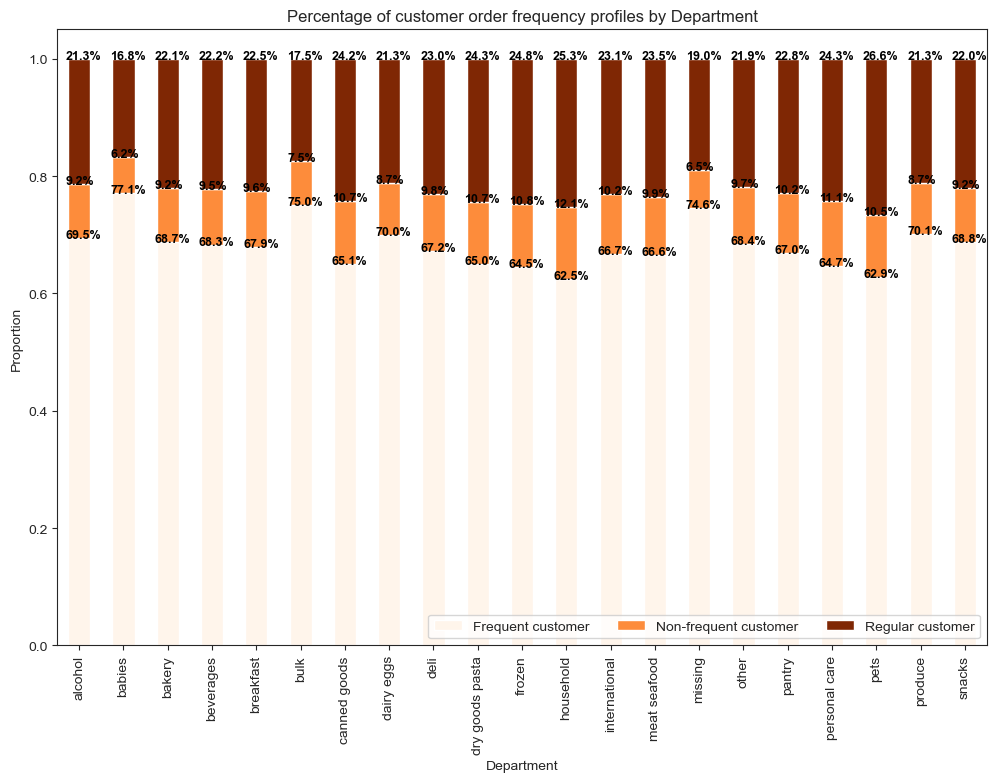

In [169]:
#crosstab department and frequency_flag - normalized to return percentages
crosstab_frequency_flag_by_department_n = pd.crosstab(index = df_merged['department'], 
                                         columns = df_merged['frequency_flag'], 
                                         normalize = 'index')

#second crosstab to put labels on chart
crosstab_frequency_flag_by_department_2 = pd.crosstab(index = df_merged['department'], 
                                         columns = df_merged['frequency_flag'])

#Distribution of customer order frequency profiles by department - Stacked bar chart
bar_normalized_frequency_flag_by_department = crosstab_frequency_flag_by_department_n.plot( kind ='bar',
                                                       stacked = True,
                                                       colormap = 'Oranges',
                                                       figsize = (12, 8))
 
plt.title('Percentage of customer order frequency profiles by Department')
plt.legend(loc = 'lower right', ncol = 3)
plt.xlabel('Department')
plt.xticks(rotation = 90)
plt.ylabel('Proportion')

for i, x in enumerate([*crosstab_frequency_flag_by_department_2.index.values]):
    for (proportion, y_loc) in zip(crosstab_frequency_flag_by_department_n.loc[x],
                                   crosstab_frequency_flag_by_department_n.loc[x].cumsum()):
    
        plt.text(x= i -0.30,
                 y= y_loc,
                 s= f'{np.round(proportion * 100, 1)}%',
                 color ='black',
                 fontsize = 9,
                 fontweight = 'bold')

plt.show()

In [170]:
# Saving stacked bar chart
bar_normalized_frequency_flag_by_department.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'stacked_bar_normalized_frequency_flag_by_department.png'))

# 8.i. Customer profile based on number of dependants by Department - Ordering habits

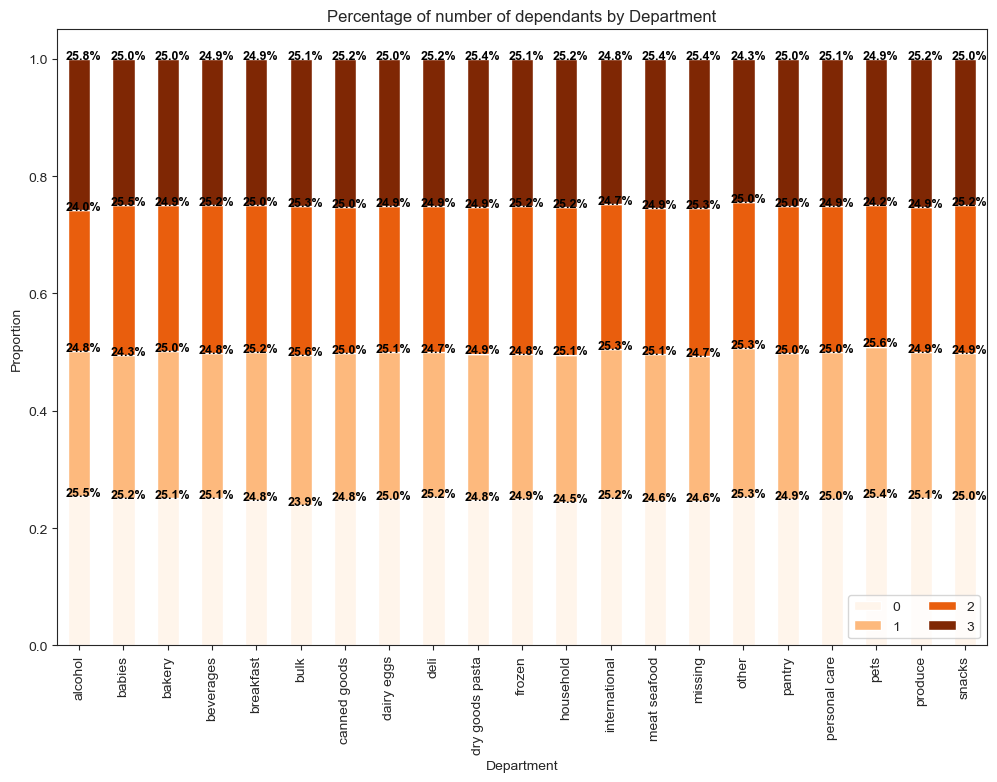

In [171]:
#crosstab department and number_of_dependants - normalized to return percentages
crosstab_dependants_by_department_n = pd.crosstab(index = df_merged['department'], 
                                         columns = df_merged['number_of_dependants'], 
                                         normalize = 'index')

#second crosstab to put labels on chart
crosstab_dependants_by_department_2 = pd.crosstab(index = df_merged['department'], 
                                         columns = df_merged['number_of_dependants'])

#Distribution of number of dependants profiles by department - Stacked bar chart
bar_normalized_dependants_by_department = crosstab_dependants_by_department_n.plot( kind ='bar',
                                                       stacked = True,
                                                       colormap = 'Oranges',
                                                       figsize = (12, 8))
 
plt.title('Percentage of number of dependants by Department')
plt.legend(loc = 'lower right', ncol = 2)
plt.xlabel('Department')
plt.xticks(rotation = 90)
plt.ylabel('Proportion')

for i, x in enumerate([*crosstab_dependants_by_department_2.index.values]):
    for (proportion, y_loc) in zip(crosstab_dependants_by_department_n.loc[x],
                                   crosstab_dependants_by_department_n.loc[x].cumsum()):
    
        plt.text(x= i -0.30,
                 y= y_loc,
                 s= f'{np.round(proportion * 100, 1)}%',
                 color ='black',
                 fontsize = 9,
                 fontweight = 'bold')

plt.show()

In [172]:
# Saving stacked bar chart
bar_normalized_dependants_by_department.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'stacked_bar_normalized_dependants_by_department.png'))

# 8.j. Customer profile based on income by Department - Ordering habits

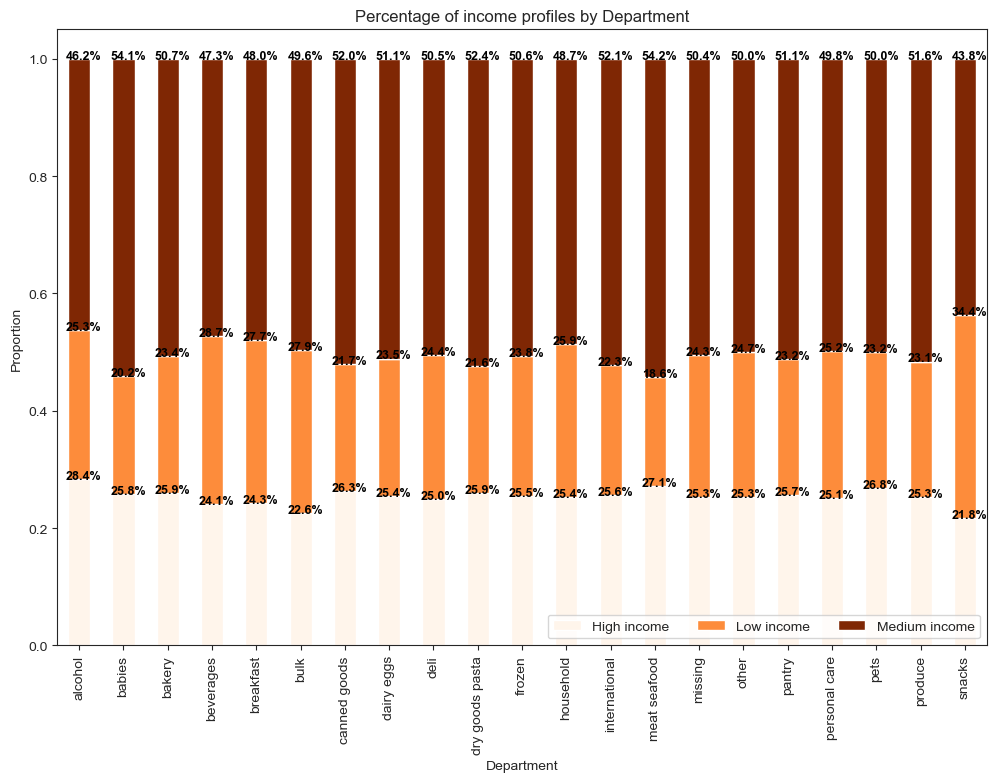

In [174]:
#crosstab department and income_group - normalized to return percentages
crosstab_income_by_department_n = pd.crosstab(index = df_merged['department'], 
                                         columns = df_merged['income_group'], 
                                         normalize = 'index')

#second crosstab to put labels on chart
crosstab_income_by_department_2 = pd.crosstab(index = df_merged['department'], 
                                         columns = df_merged['income_group'])

#Distribution of income profiles by department - Stacked bar chart
bar_normalized_income_by_department = crosstab_income_by_department_n.plot( kind ='bar',
                                                       stacked = True,
                                                       colormap = 'Oranges',
                                                       figsize = (12, 8))
 
plt.title('Percentage of income profiles by Department')
plt.legend(loc = 'lower right', ncol = 3)
plt.xlabel('Department')
plt.xticks(rotation = 90)
plt.ylabel('Proportion')

for i, x in enumerate([*crosstab_income_by_department_2.index.values]):
    for (proportion, y_loc) in zip(crosstab_income_by_department_n.loc[x],
                                   crosstab_income_by_department_n.loc[x].cumsum()):
    
        plt.text(x= i -0.30,
                 y= y_loc,
                 s= f'{np.round(proportion * 100, 1)}%',
                 color ='black',
                 fontsize = 9,
                 fontweight = 'bold')

plt.show()

In [175]:
# Saving stacked bar chart
bar_normalized_income_by_department.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'stacked_bar_normalized_income_by_department.png'))

# 8.k. Customer profile based on age group by Department - Ordering habits

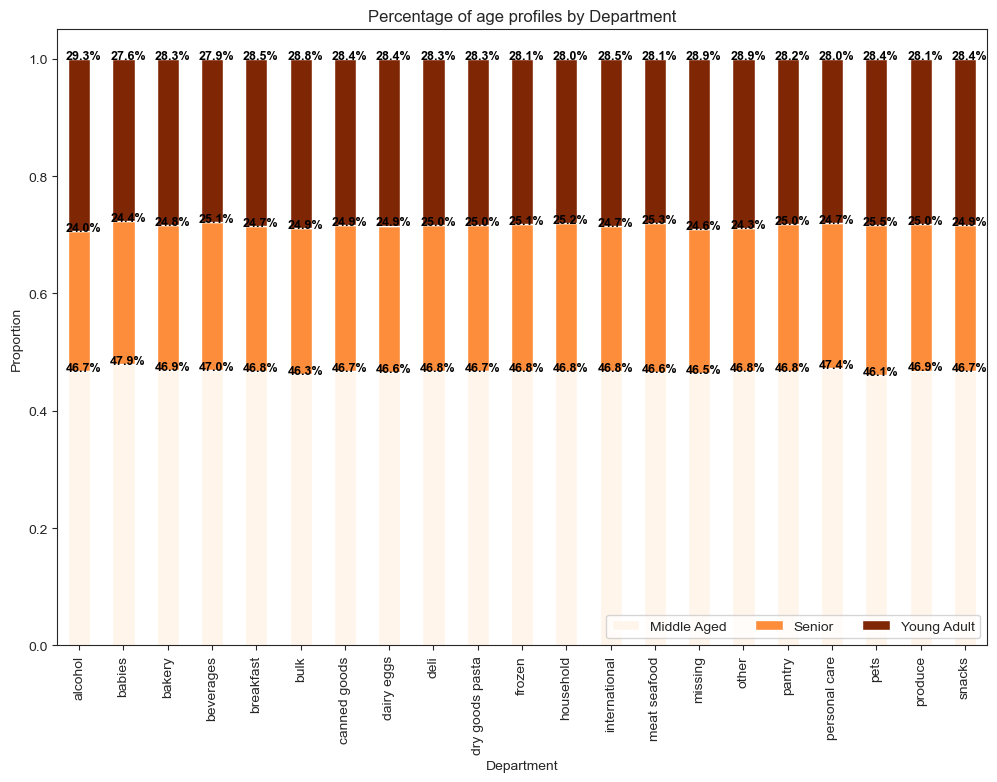

In [176]:
#crosstab department and age_group - normalized to return percentages
crosstab_age_by_department_n = pd.crosstab(index = df_merged['department'], 
                                         columns = df_merged['age_group'], 
                                         normalize = 'index')

#second crosstab to put labels on chart
crosstab_age_by_department_2 = pd.crosstab(index = df_merged['department'], 
                                         columns = df_merged['age_group'])

#Distribution of age profiles by department - Stacked bar chart
bar_normalized_age_by_department = crosstab_age_by_department_n.plot( kind ='bar',
                                                       stacked = True,
                                                       colormap = 'Oranges',
                                                       figsize = (12, 8))
 
plt.title('Percentage of age profiles by Department')
plt.legend(loc = 'lower right', ncol = 3)
plt.xlabel('Department')
plt.xticks(rotation = 90)
plt.ylabel('Proportion')

for i, x in enumerate([*crosstab_age_by_department_2.index.values]):
    for (proportion, y_loc) in zip(crosstab_age_by_department_n.loc[x],
                                   crosstab_age_by_department_n.loc[x].cumsum()):
    
        plt.text(x= i -0.30,
                 y= y_loc,
                 s= f'{np.round(proportion * 100, 1)}%',
                 color ='black',
                 fontsize = 9,
                 fontweight = 'bold')

plt.show()

In [178]:
# Saving stacked bar chart
bar_normalized_age_by_department.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'stacked_bar_normalized_age_by_department.png'))

# 8.l. Orders based on spender type by Region - Ordering habits

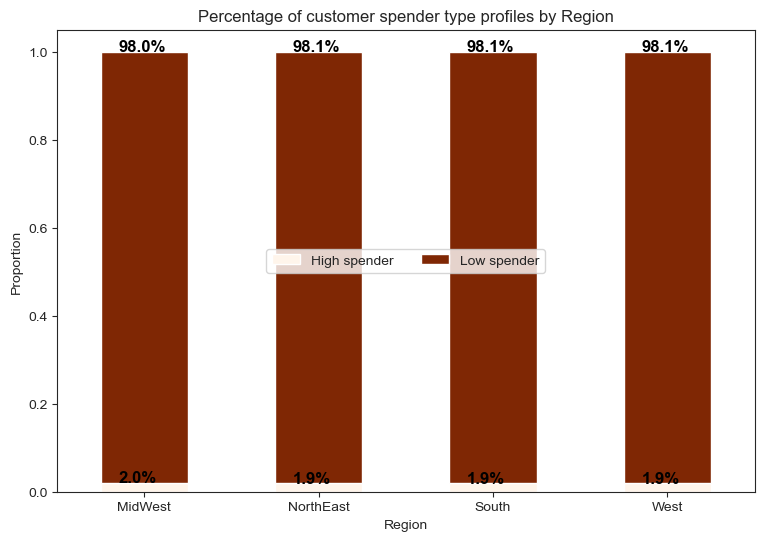

In [182]:
#crosstab region and spender_type_flag - normalized to return percentages
crosstab_spender_type_by_region_n = pd.crosstab(index = df_merged['region'], 
                                         columns = df_merged['spender_type_flag'], 
                                         normalize = 'index')

#second crosstab to put labels on chart
crosstab_spender_type_by_region_2 = pd.crosstab(index = df_merged['region'], 
                                         columns = df_merged['spender_type_flag'])


#Regional distribution of spender type profiles - Stacked bar chart
bar_normalized_spender_type_by_region = crosstab_spender_type_by_region_n.plot( kind ='bar',
                                                       stacked = True,
                                                       colormap = 'Oranges',
                                                       figsize = (9, 6))
 
plt.title('Percentage of customer spender type profiles by Region')
plt.legend(loc = 'center', ncol = 3)
plt.xlabel('Region')
plt.xticks(rotation = 0)
plt.ylabel('Proportion')

for i, x in enumerate([*crosstab_spender_type_by_region_2.index.values]):
    for (proportion, y_loc) in zip(crosstab_spender_type_by_region_n.loc[x],
                                   crosstab_spender_type_by_region_n.loc[x].cumsum()):
    
        plt.text(x= i -0.15,
                 y= y_loc,
                 s= f'{np.round(proportion * 100, 1)}%',
                 color ='black',
                 fontsize = 12,
                 fontweight = 'bold')

plt.show()

In [183]:
# Saving stacked bar chart
bar_normalized_spender_type_by_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'stacked_bar_normalized_spender_type_by_region.png'))

# 8.m. Orders based on age group by day of the week

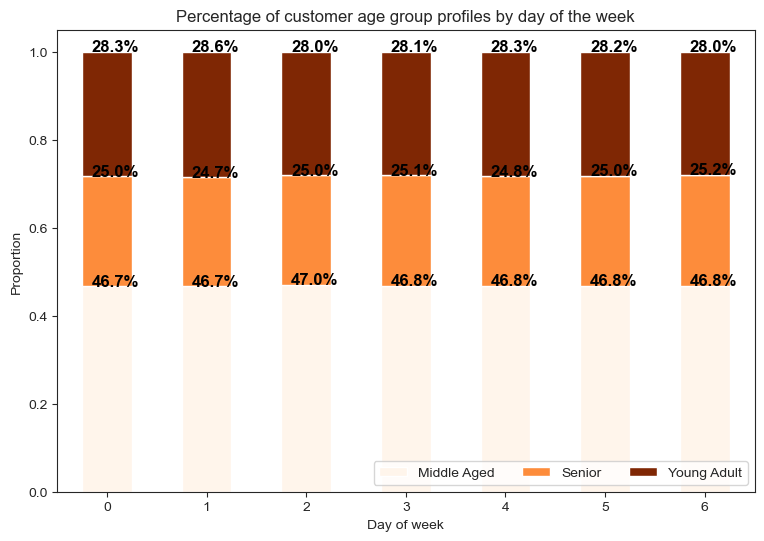

In [212]:
#crosstab orders_day_of_week and age_group - normalized to return percentages
crosstab_age_group_by_dow_n = pd.crosstab(index = df_merged['orders_day_of_week'], 
                                         columns = df_merged['age_group'], 
                                         normalize = 'index')

#second crosstab to put labels on chart
crosstab_age_group_by_dow_2 = pd.crosstab(index = df_merged['orders_day_of_week'], 
                                         columns = df_merged['age_group'])


#Distribution of age group profiles - Stacked bar chart
bar_normalized_age_group_by_dow = crosstab_age_group_by_dow_n.plot( kind ='bar',
                                                       stacked = True,
                                                       colormap = 'Oranges',
                                                       figsize = (9, 6))
 
plt.title('Percentage of customer age group profiles by day of the week')
plt.legend(loc = 'lower right', ncol = 3)
plt.xlabel('Day of week')
plt.xticks(rotation = 0)
plt.ylabel('Proportion')

for i, x in enumerate([*crosstab_age_group_by_dow_2.index.values]):
    for (proportion, y_loc) in zip(crosstab_age_group_by_dow_n.loc[x],
                                   crosstab_age_group_by_dow_n.loc[x].cumsum()):
    
        plt.text(x= i -0.15,
                 y= y_loc,
                 s= f'{np.round(proportion * 100, 1)}%',
                 color ='black',
                 fontsize = 12,
                 fontweight = 'bold')

plt.show()

In [214]:
# Saving stacked bar chart
bar_normalized_age_group_by_dow.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'stacked_bar_normalized_age_group_by_dow.png'))

# 8.n. Departments with most orders

In [188]:
# crosstab departments and orders_day_of_week - normalized
crosstab_department_by_dow_n = pd.crosstab(index = df_merged['orders_day_of_week'], 
                                    columns = df_merged['department'], 
                                    normalize = 'index')



In [191]:
crosstab_department_by_dow_n


department           alcohol    babies    bakery  beverages  breakfast  \
orders_day_of_week                                                       
0                   0.002738  0.013358  0.036292   0.069744   0.020227   
1                   0.003585  0.013063  0.035968   0.085547   0.022652   
2                   0.004776  0.013660  0.036056   0.088329   0.022519   
3                   0.005776  0.013825  0.036158   0.089902   0.022446   
4                   0.006846  0.013779  0.036241   0.089861   0.022357   
5                   0.006399  0.012363  0.036424   0.089424   0.022222   
6                   0.004195  0.012874  0.036271   0.075735   0.019824   

department              bulk  canned goods  dairy eggs      deli  \
orders_day_of_week                                                 
0                   0.001002      0.036561    0.164386  0.033778   
1                   0.001134      0.031453    0.169338  0.032607   
2                   0.001095      0.031155    0.168345  0.032106   
3                   0.001118      0.030788    0.167220  0.031749   
4                   0.001064      0.030248    0.168176  0.031586   
5                   0.001108      0.030419    0.169610  0.031954   
6                   0.001062      0.036147    0.164176  0.032317   

department          dry goods pasta  ...  household  international  \
orders_day_of_week                   ...                             
0                          0.029201  ...   0.020167       0.008967   
1                          0.025902  ...   0.021261       0.008146   
2                          0.026116  ...   0.023652       0.008115   
3                          0.025516  ...   0.024689       0.008186   
4                          0.025180  ...   0.024437       0.007770   
5                          0.024478  ...   0.023405       0.007758   
6                          0.028120  ...   0.022570       0.008568   

department          meat seafood   missing     other    pantry  personal care  \
orders_day_of_week                                                              
0                       0.024360  0.002081  0.000973  0.056438       0.012877   
1                       0.020940  0.001972  0.001049  0.053570       0.012679   
2                       0.020514  0.002007  0.001168  0.056879       0.014141   
3                       0.020173  0.002126  0.001193  0.058986       0.014825   
4                       0.020254  0.002108  0.001199  0.059233       0.014424   
5                       0.020796  0.002200  0.001187  0.058788       0.013676   
6                       0.024150  0.002192  0.001112  0.061079       0.014177   

department              pets   produce    snacks  
orders_day_of_week                                
0                   0.002751  0.315672  0.078030  
1                   0.002559  0.297949  0.095437  
2                   0.002842  0.284989  0.095067  
3                   0.003262  0.279117  0.094162  
4                   0.003280  0.279013  0.094682  
5                   0.003227  0.281799  0.094102  
6                   0.003411  0.298823  0.078748  

[7 rows x 21 columns]

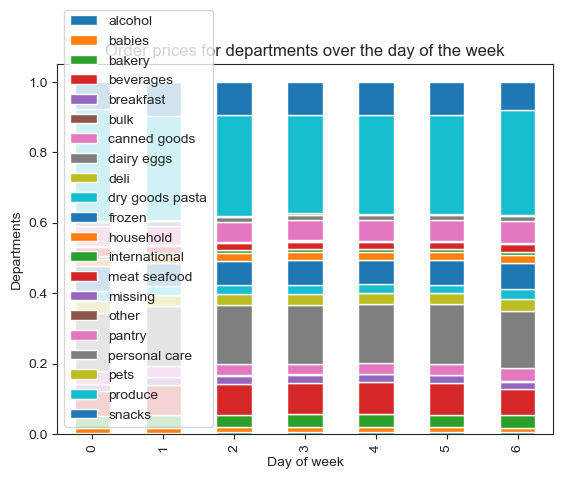

In [205]:
#Creating a STACKED BAR CHART chart using crosstab() function in pandas python
crosstab_department_by_dow_n.plot(kind='bar', stacked = True)
plt.xlabel('Day of week')
plt.ylabel('Departments')
plt.title('Order prices for departments over the day of the week')
plt.legend()
plt.show()


# This stacked bar chart is crowded and I have saved the crosstab as a table in Excel.

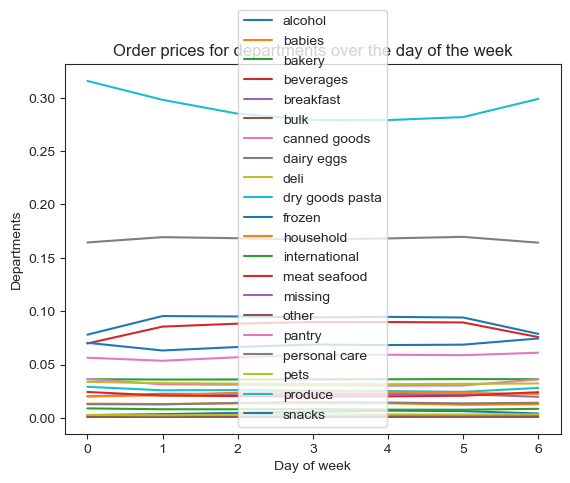

In [206]:
#line = sns.lineplot(data = sns.lineplot(data=crosstab_department_by_dow_n), x = 'orders_day_of_week',y = 'department').set_title('Order prices over the days of the week')

#Creating a Line chart using crosstab() function in pandas python
crosstab_department_by_dow_n.plot(kind='line')
plt.xlabel('Day of week')
plt.ylabel('Departments')
plt.title('Order prices for departments over the day of the week')
plt.legend()
plt.show()


# This line chart is crowded and I have saved the crosstab as a table in Excel.

# 8.o. Average price of items by department

In [192]:
average_price_by_department = df_merged.groupby('department').agg({'prices': ['mean']})

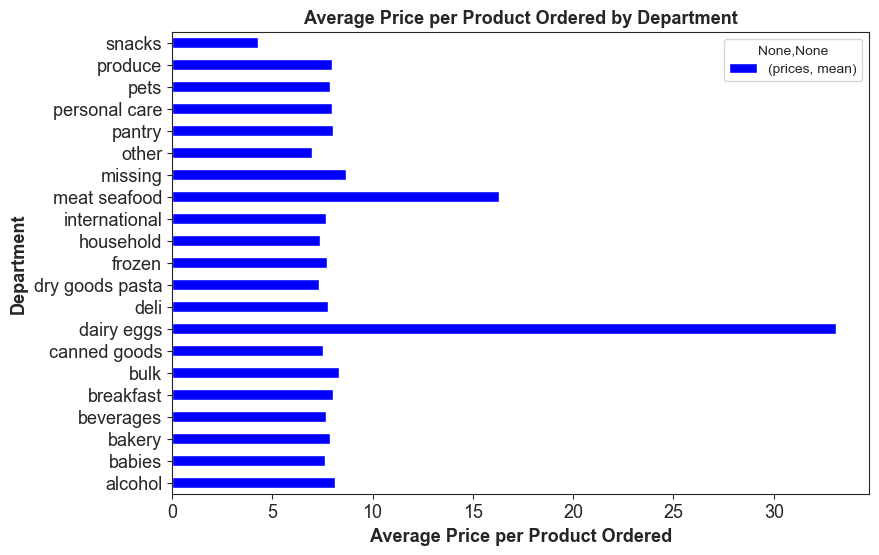

In [194]:
# Bar chart of average price per product ordered by department
bar_average_price_by_department = average_price_by_department.plot.barh(figsize = (9,6), color = ['blue'])
sns.set_style('ticks')
plt.xlabel('Average Price per Product Ordered', fontsize = 13, fontweight = 'bold')
plt.ylabel('Department', fontsize = 13, fontweight = 'bold')
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.title('Average Price per Product Ordered by Department', fontsize = 13, fontweight = 'bold')
plt.show()

#  The average price for dairy and eggs is the highest with meat and seafood being the next highest.

In [208]:
# Saving stacked bar chart
bar_average_price_by_department.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_average_price_by_department.png'))

# Price range groupings on products

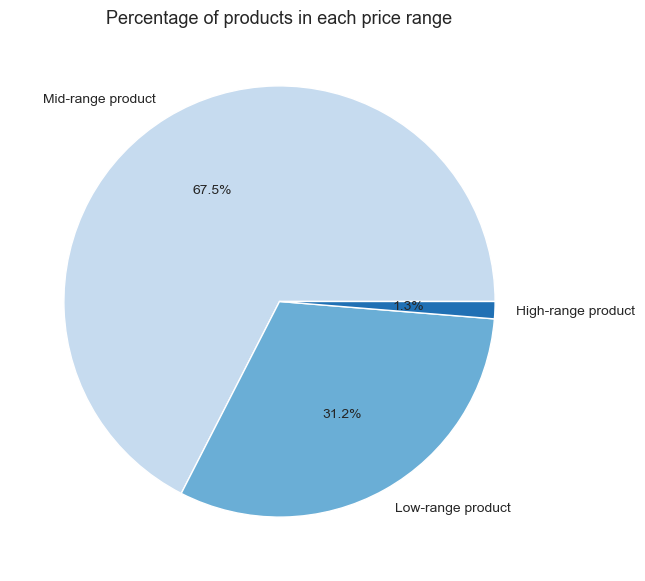

In [209]:
# Making a pie chart showing products in different price ranges

pie_price_range = df_merged['price_range_loc'].value_counts().plot.pie(figsize = (7,7,), 
                                                                colors = sns.color_palette('Blues', 3), 
                                                                autopct = '%1.1f%%')
plt.ylabel('')
plt.title('Percentage of products in each price range',fontsize=13)
plt.show()

In [210]:
# Saving pie chart
pie_price_range.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_price_range.png'))

# 8. p. Customer Age group and Number of dependants

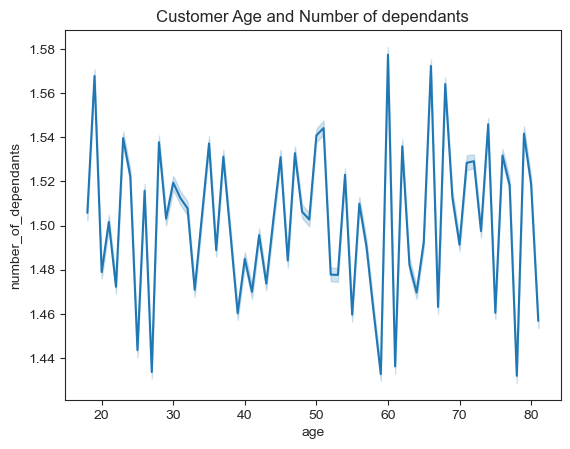

In [217]:
# Generate the line plot
line_plot_age_dependants = sns.lineplot(data = df_merged, x = 'age', y = 'number_of_dependants').set_title('Customer Age and Number of dependants')


In [218]:
# Saving line plot
line_plot_age_dependants.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_plot_age_dependants.png'))